In [22]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
data= pd.read_csv('Fish_dataset.csv')

In [26]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Plot a bar chart showing count of individual species? 

<AxesSubplot:xlabel='Species', ylabel='Count'>

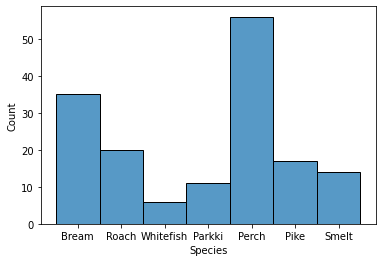

In [28]:
sns.histplot(data['Species'])

## Identify outliers and remove if any?

In [29]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [30]:
data[data['Weight'] >= data['Weight'].quantile(0.95)]

,Species,Weight,Length1,Length2,Length3,Height,Width
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
121,Perch,1015.0,37.0,40.0,42.4,12.3808,7.4624
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
124,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
126,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420
127,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440


In [31]:
data['Weight'] = data['Weight'].clip(upper = data['Weight'].quantile(0.95))

## Build a regression model and print regression equation?

In [32]:
X = data.iloc[:, 2:]
y = data.iloc[:, 1]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [35]:
regr = LinearRegression()

In [36]:
regr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regr.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
print( mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10532.646698154429
0.8806365865291148


In [40]:
regr.coef_

array([113.48474426, -50.11026688, -42.59484244,  41.389885  ,
        47.53145258])

In [41]:
# Equation --> Weight = 113.48474426*length1 + (-50.11026688)*length2 + (-42.59484244)*Length3 + 41.389885*Height + 
#                        47.53145258*Width

## What is the mean score of the model at 95% confidence interval?


In [44]:
import scipy.stats as stat
stat.norm.interval(alpha = 0.95, loc = np.mean(data.iloc[:,1:]), scale = stat.sem(data.iloc[:,1:]))

(array([334.1230024 ,  24.69337043,  26.75002808,  29.42240251,
          8.30476594,   4.15545218]),
 array([434.03926175,  27.8009692 ,  30.08141846,  33.03168554,
          9.63722148,   4.67951889]))

## Compare real and predicted weights and give a conclusion statement based on it?

In [45]:
#Predicted Weights
print("Weights = ", regr.coef_)
print("Intercept = ", regr.intercept_)

Weights =  [113.48474426 -50.11026688 -42.59484244  41.389885    47.53145258]
Intercept =  -419.4819745101534


In [46]:
regr2 = LinearRegression()

In [48]:
regr2.fit(X,y)

LinearRegression()

In [50]:
#Real Weights
print("Weights = ", regr2.coef_)
print("Intercept = ", regr2.intercept_)

Weights =  [104.14470627 -48.39588159 -35.30561948  37.02930207  48.90443805]
Intercept =  -419.95282950508084


> It can be concluded by saying that Length1 and  Height are more than the Real Weights.

> It is also seen that Length 2 , Length 3 and Width are less than the Real Weights.